# Regressão Softmax com dados do MNIST

## Objetivo

O objetivo deste notebook é ilustrar o uso de praticamente a mesma rede desenvolvida para a classificação das flores Íris, porém agora com o problema de classificação de dígitos manuscritos utilizando o dataset MNIST.
As principais diferenças são:
- tipo do dado, agora imagem com muito atributos: 28 x 28 pixels
- número de amostras, muito maior, 60 mil
Neste exercício será possível a interpretação do significado dos parâmetros treinados

## Importação das bibliotecas

In [23]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
from torch.autograd import Variable

# Atualizar torchvision para uma versão compatível
!pip install --upgrade torchvision
import torchvision

## Carregamento dos dados do MNIST

In [24]:
! git clone https://github.com/vcasadei/MNIST.git

fatal: destination path 'MNIST' already exists and is not an empty directory.


In [25]:
!ls MNIST

processed  raw


In [26]:
dataset_dir = 'MNIST/'

x_train, y_train = torch.load(dataset_dir + 'processed/training.pt')

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 60000

Dimensões dos dados das imagens:    torch.Size([60000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0, dtype=torch.uint8) tensor(255, dtype=torch.uint8)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


### Carregamento, normalização e seleção dos dados do MNIST

Neste exemplo utilizaremos apenas 1000 amostras de treinamento.

In [27]:
x_train = x_train.float()

x_train = x_train / 255.

if True:
    n_samples_train = 1000

    x_train = x_train[:n_samples_train]
    y_train = y_train[:n_samples_train]

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 1000

Dimensões dos dados das imagens:    torch.Size([1000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0.) tensor(1.)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


### Visualizando os dados

(np.float64(-0.5), np.float64(232.5), np.float64(87.5), np.float64(-0.5))

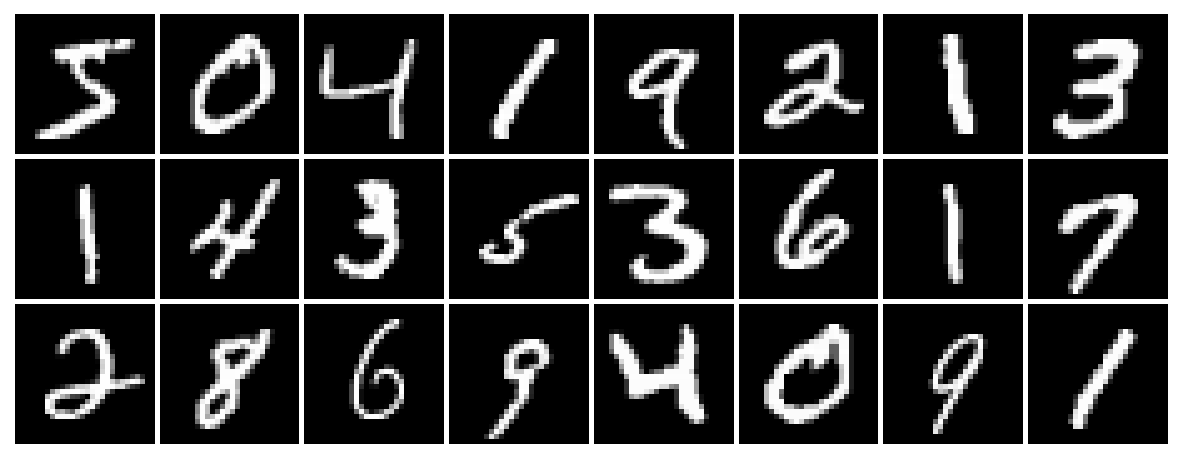

In [28]:
n_samples = 24

# cria um grid com as imagens
grid = torchvision.utils.make_grid(x_train[:n_samples].unsqueeze(dim=1), pad_value=1.0, padding=1)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off')

### Visualizando uma imagem com o matplotlib

class: tensor(0)


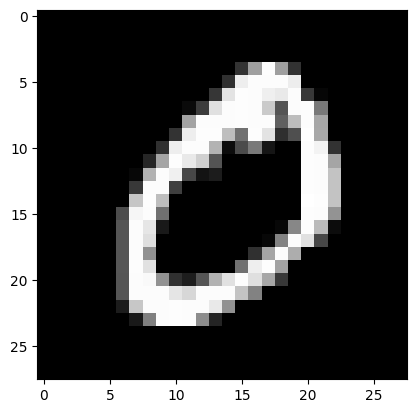

In [29]:
image  = x_train[1]
target = y_train[1]

plt.imshow(image.numpy(), cmap='gray')
print('class:', target)

## Modelo

In [30]:
model = torch.nn.Linear(28*28, 10) # 28*28 = 784 atributos de entrada e 10 neurônios na sáida -<>- 784 * 10+10 = 7850 parâmetros

In [31]:
x_train[0].view(-1,28*28)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

### Testando um predict com poucas amostras

In [32]:
xin = x_train[:5].view(-1,28*28)
score = model(xin)
score

tensor([[ 0.2222, -0.0066, -0.0494,  0.4142,  0.2010,  0.2798,  0.2624,  0.2638,
         -0.1336, -0.1347],
        [-0.0294, -0.1308,  0.0255,  0.2093, -0.0556,  0.3430,  0.1188, -0.0450,
          0.0775, -0.1037],
        [-0.0050, -0.1263, -0.0446, -0.0736,  0.1051, -0.2438,  0.1459,  0.2416,
         -0.0021, -0.0677],
        [-0.0476,  0.0314, -0.0620,  0.0546,  0.1885,  0.2291,  0.2291, -0.2867,
         -0.1376, -0.2244],
        [-0.1975, -0.0859, -0.0012,  0.1477,  0.0224,  0.1202,  0.3970, -0.2720,
         -0.1746, -0.0702]], grad_fn=<AddmmBackward0>)

In [33]:
import torch.nn as nn
import torch.nn.functional as F
prob,y_pred = torch.max(F.softmax(score,dim=1),dim=1)
print(y_pred)
print(prob)

tensor([3, 5, 7, 5, 6])
tensor([0.1304, 0.1339, 0.1271, 0.1242, 0.1477], grad_fn=<MaxBackward0>)


## Treinamento

### Inicialização dos parâmetros

In [34]:
epochs = 100
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Visualização do grafo computacional da perda (loss)

In [35]:
!pip install graphviz
!pip install git+https://github.com/szagoruyko/pytorchviz

  Cloning https://github.com/szagoruyko/pytorchviz to /tmp/pip-req-build-vvlfbcjd
  Running command git clone --filter=blob:none --quiet https://github.com/szagoruyko/pytorchviz /tmp/pip-req-build-vvlfbcjd
  Resolved https://github.com/szagoruyko/pytorchviz to commit 5cf04c13e601366f6b9cf5939b5af5144d55b887
  Preparing metadata (setup.py) ... done


In [36]:
from torchviz import make_dot, make_dot_from_trace
y_pred = model(Variable(x_train.view(-1,28*28)))
loss = criterion(y_pred, Variable(y_train))
loss
# p = make_dot(loss, dict(model.named_parameters()))
# p

tensor(2.2907, grad_fn=<NllLossBackward0>)

### Laço de treinamento dos pesos

Epoch[1/100], loss: 0.261985, acc: 0.945000


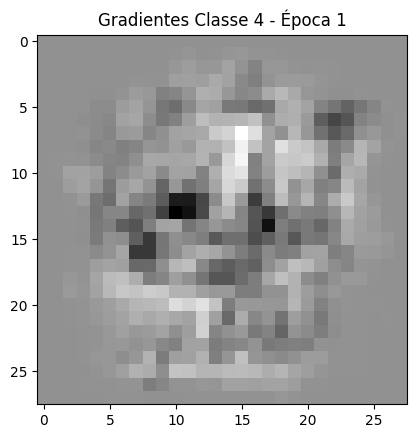

Epoch[2/100], loss: 0.260695, acc: 0.945000


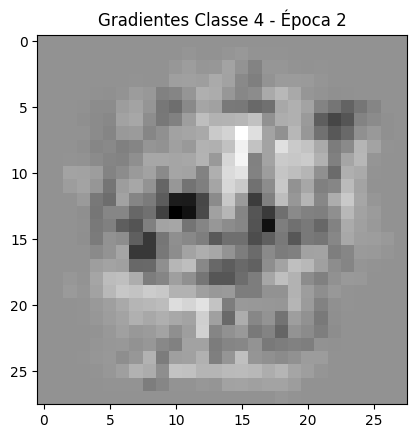

Epoch[3/100], loss: 0.259420, acc: 0.945000


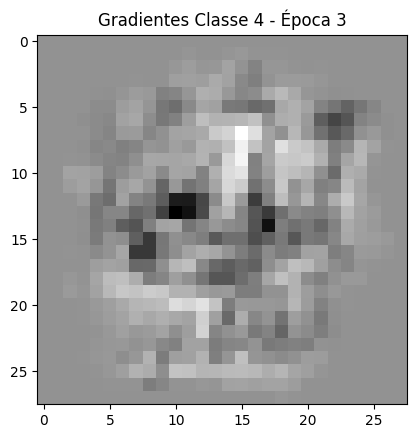

Epoch[4/100], loss: 0.258159, acc: 0.945000


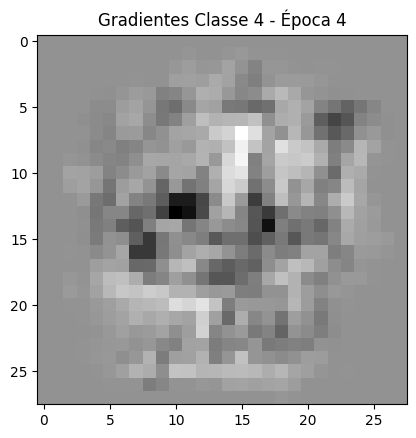

Epoch[5/100], loss: 0.256912, acc: 0.945000


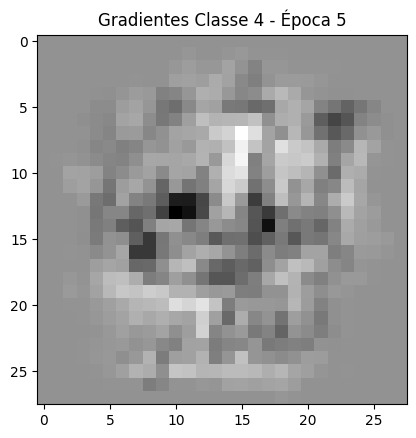

Epoch[6/100], loss: 0.255680, acc: 0.945000


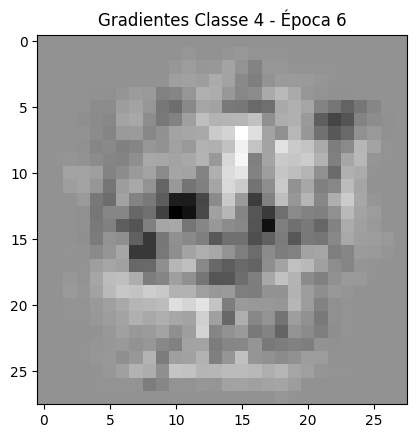

Epoch[7/100], loss: 0.254461, acc: 0.945000


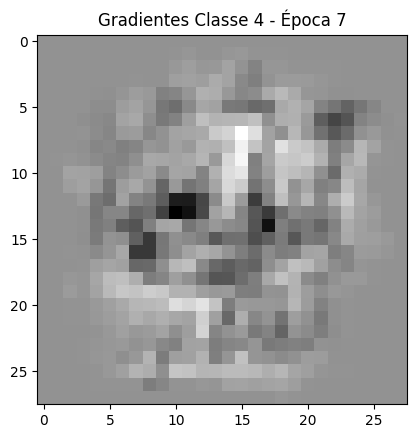

Epoch[8/100], loss: 0.253255, acc: 0.945000


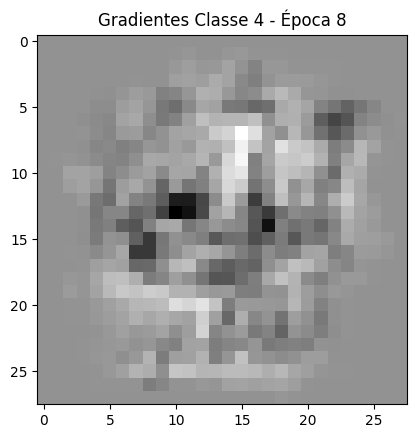

Epoch[9/100], loss: 0.252062, acc: 0.945000


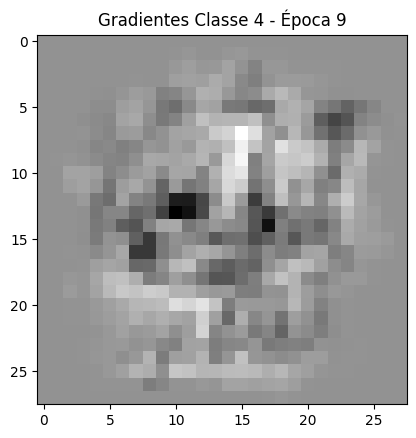

Epoch[10/100], loss: 0.250883, acc: 0.945000


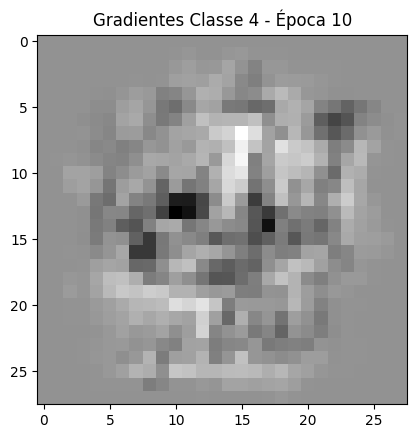

Epoch[11/100], loss: 0.249715, acc: 0.946000


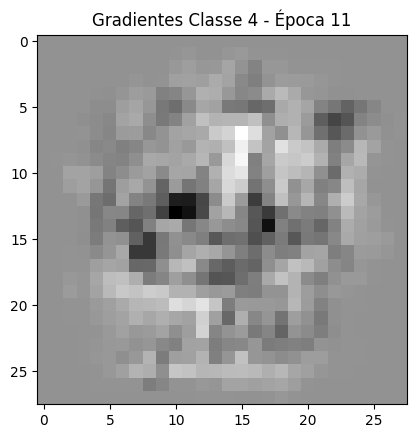

Epoch[12/100], loss: 0.248560, acc: 0.946000


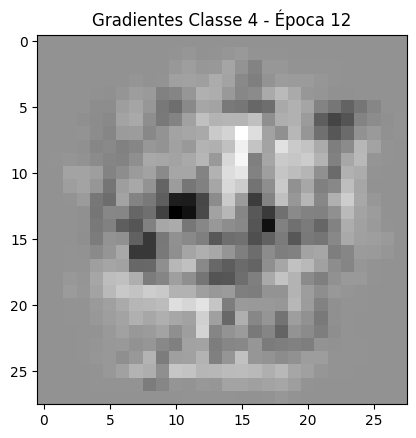

Epoch[13/100], loss: 0.247418, acc: 0.946000


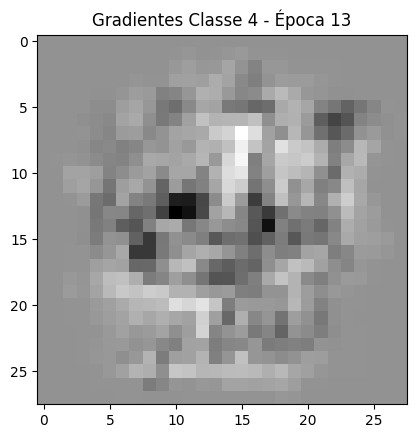

Epoch[14/100], loss: 0.246287, acc: 0.946000


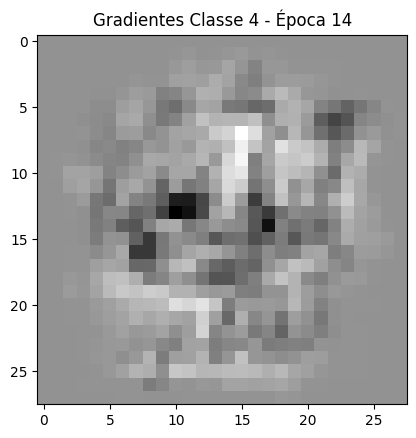

Epoch[15/100], loss: 0.245167, acc: 0.946000


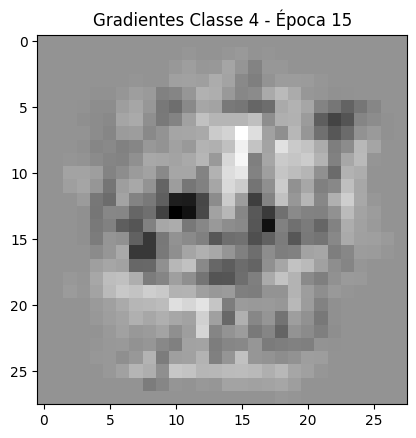

Epoch[16/100], loss: 0.244059, acc: 0.946000


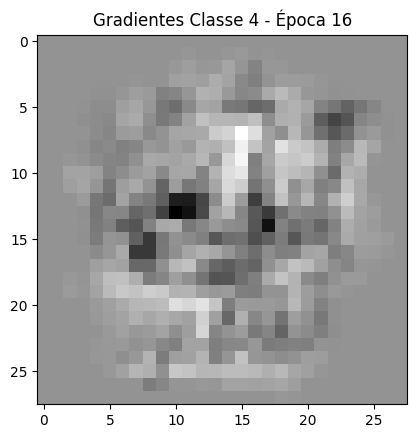

Epoch[17/100], loss: 0.242963, acc: 0.947000


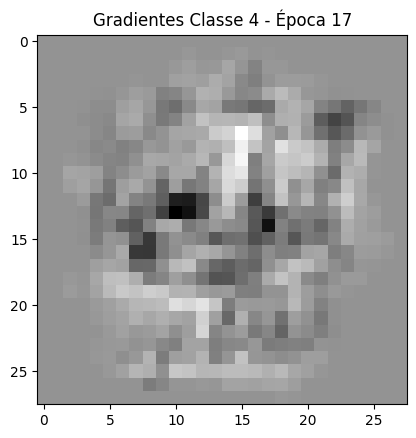

Epoch[18/100], loss: 0.241877, acc: 0.947000


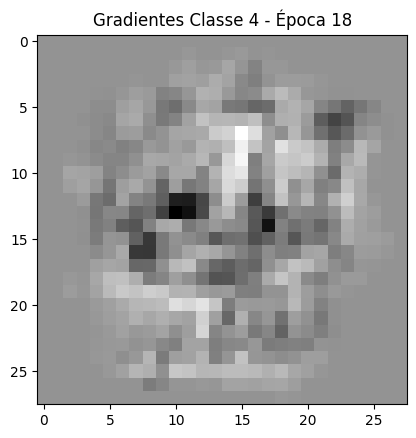

Epoch[19/100], loss: 0.240802, acc: 0.947000


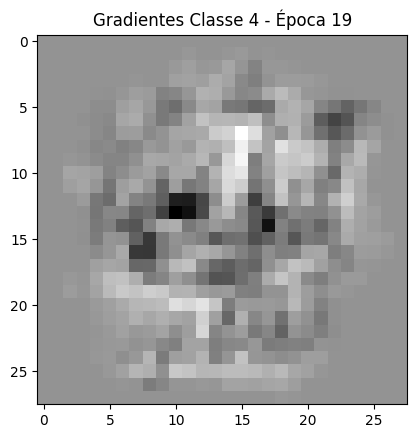

Epoch[20/100], loss: 0.239738, acc: 0.947000


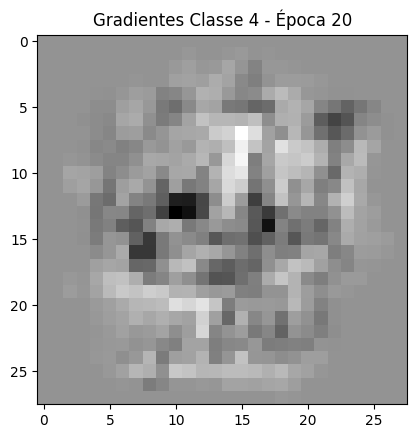

Epoch[21/100], loss: 0.238684, acc: 0.948000


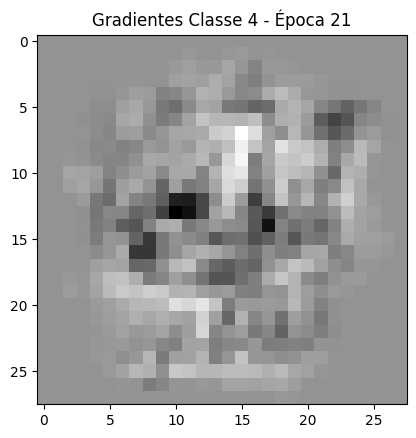

Epoch[22/100], loss: 0.237640, acc: 0.948000


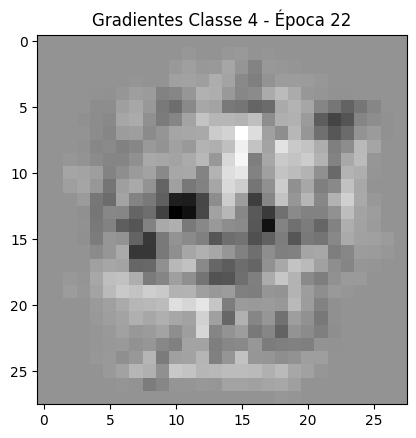

Epoch[23/100], loss: 0.236606, acc: 0.949000


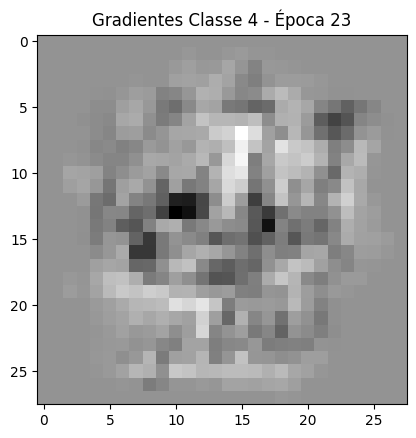

Epoch[24/100], loss: 0.235582, acc: 0.949000


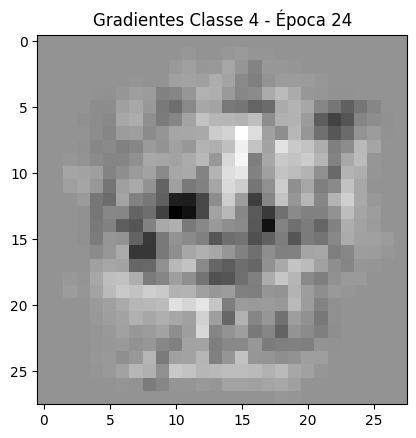

Epoch[25/100], loss: 0.234568, acc: 0.949000


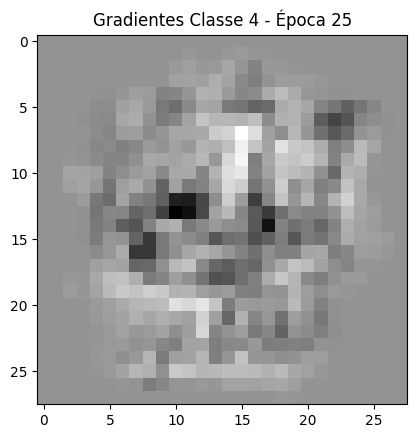

Epoch[26/100], loss: 0.233563, acc: 0.949000


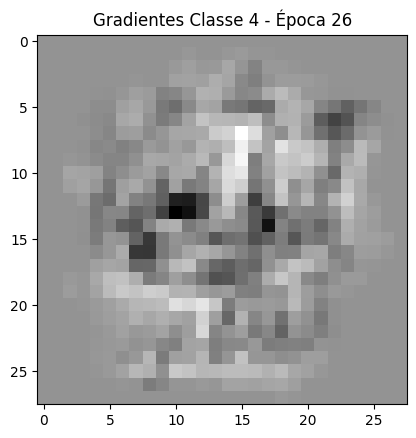

Epoch[27/100], loss: 0.232568, acc: 0.951000


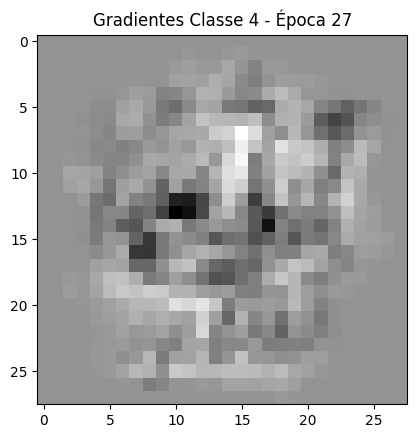

Epoch[28/100], loss: 0.231582, acc: 0.951000


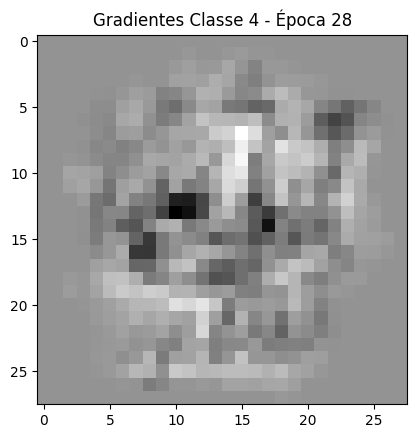

Epoch[29/100], loss: 0.230605, acc: 0.951000


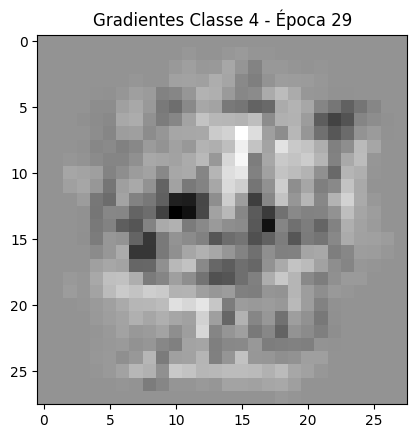

Epoch[30/100], loss: 0.229637, acc: 0.953000


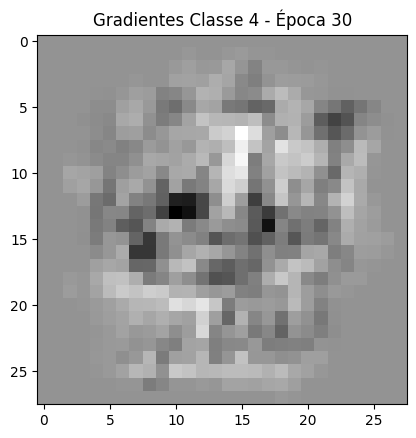

Epoch[31/100], loss: 0.228677, acc: 0.953000


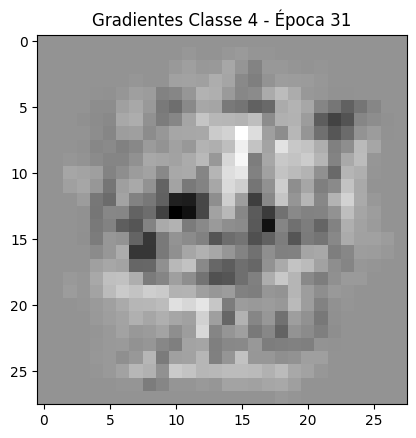

Epoch[32/100], loss: 0.227727, acc: 0.953000


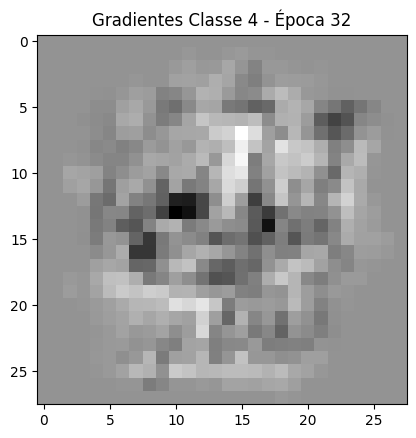

Epoch[33/100], loss: 0.226784, acc: 0.953000


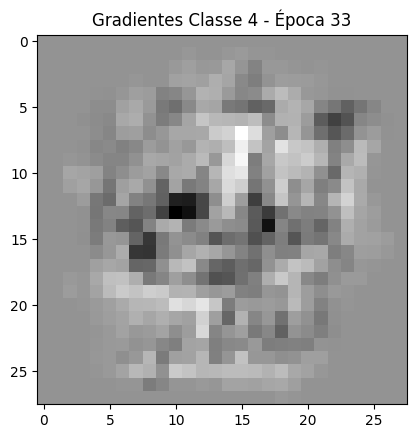

Epoch[34/100], loss: 0.225851, acc: 0.953000


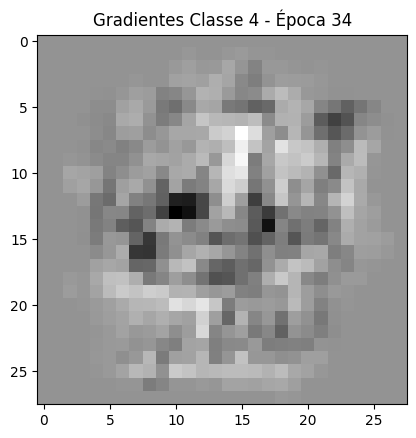

Epoch[35/100], loss: 0.224925, acc: 0.954000


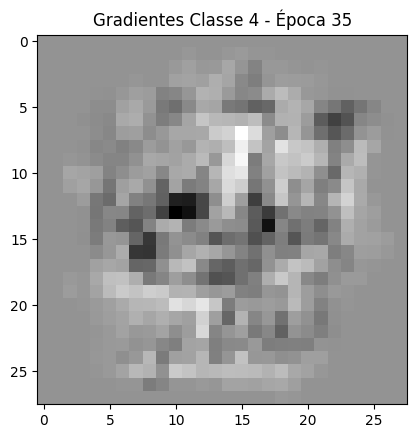

Epoch[36/100], loss: 0.224007, acc: 0.954000


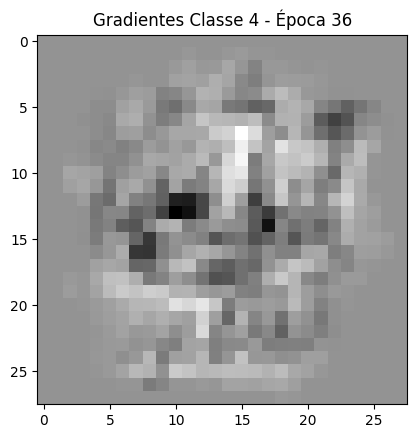

Epoch[37/100], loss: 0.223098, acc: 0.954000


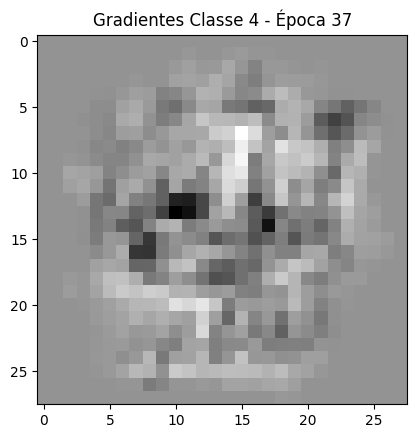

Epoch[38/100], loss: 0.222196, acc: 0.955000


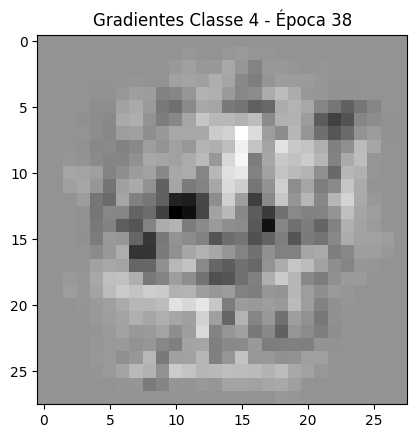

Epoch[39/100], loss: 0.221302, acc: 0.955000


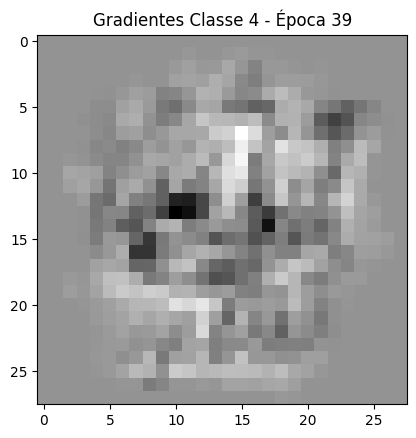

Epoch[40/100], loss: 0.220415, acc: 0.955000


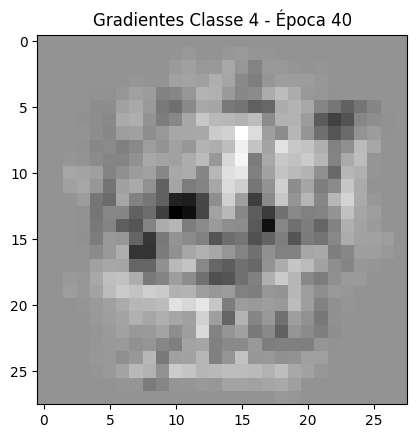

Epoch[41/100], loss: 0.219536, acc: 0.956000


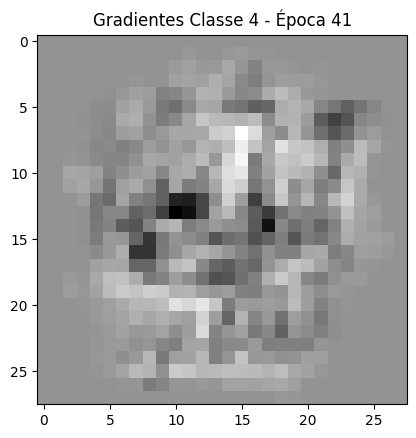

Epoch[42/100], loss: 0.218664, acc: 0.956000


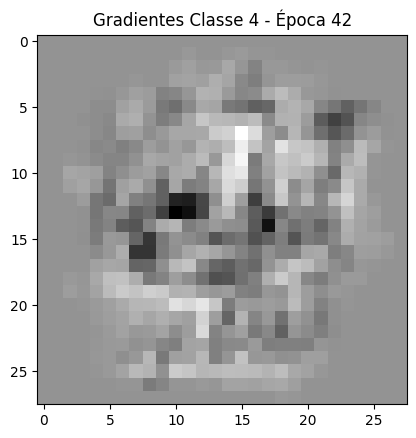

Epoch[43/100], loss: 0.217800, acc: 0.957000


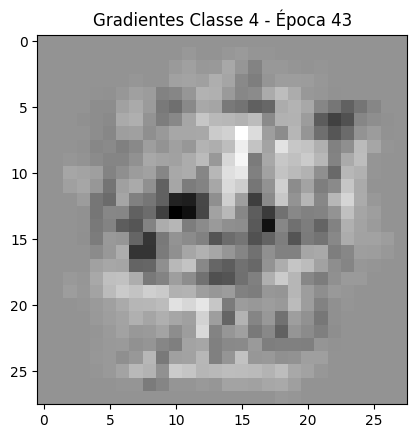

Epoch[44/100], loss: 0.216943, acc: 0.957000


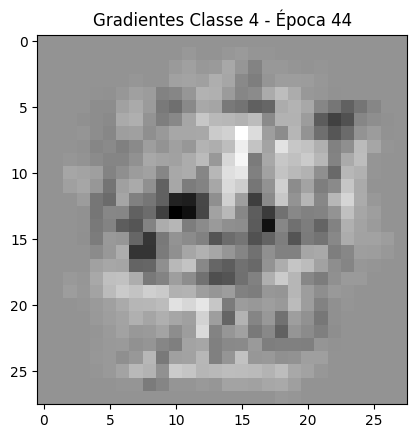

Epoch[45/100], loss: 0.216092, acc: 0.957000


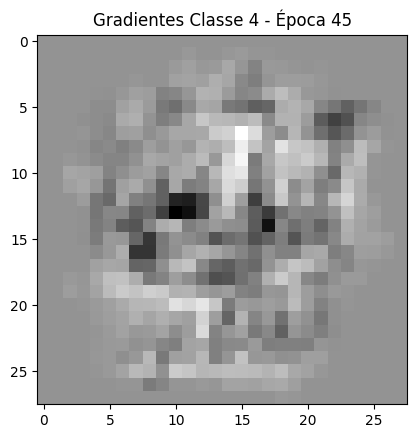

Epoch[46/100], loss: 0.215249, acc: 0.957000


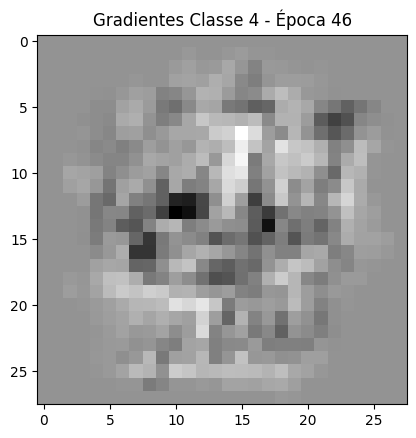

Epoch[47/100], loss: 0.214413, acc: 0.957000


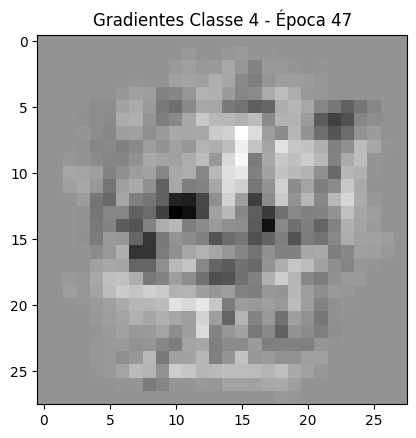

Epoch[48/100], loss: 0.213583, acc: 0.958000


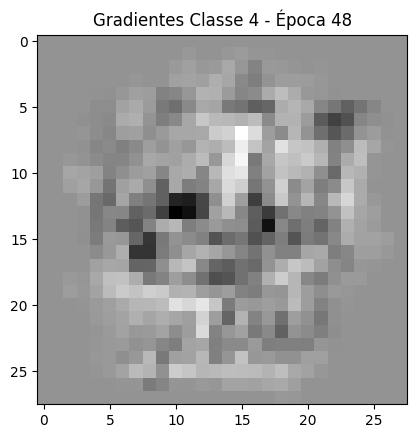

Epoch[49/100], loss: 0.212760, acc: 0.958000


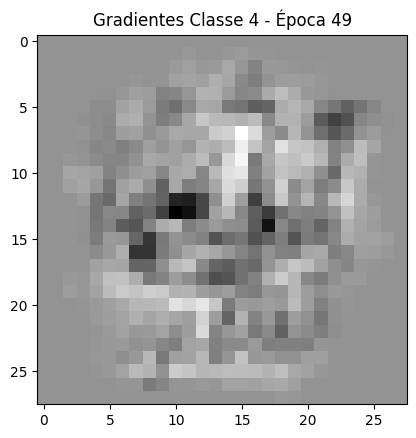

Epoch[50/100], loss: 0.211944, acc: 0.958000


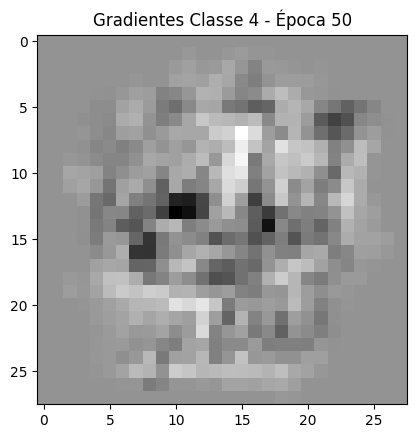

Epoch[51/100], loss: 0.211134, acc: 0.958000


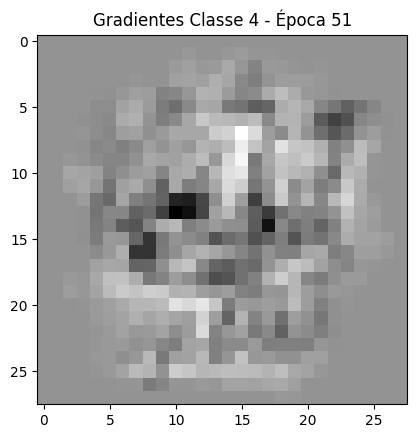

Epoch[52/100], loss: 0.210330, acc: 0.958000


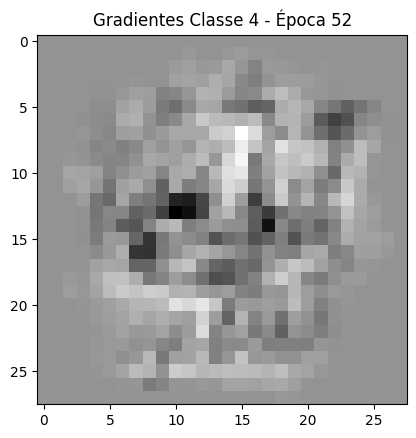

Epoch[53/100], loss: 0.209533, acc: 0.958000


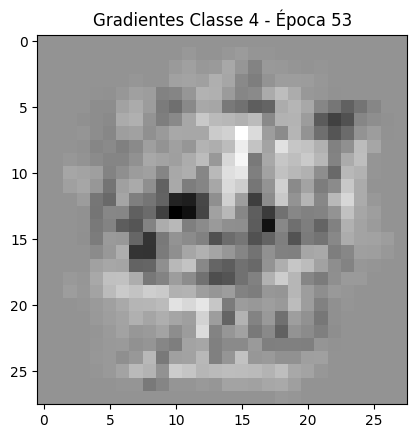

Epoch[54/100], loss: 0.208742, acc: 0.958000


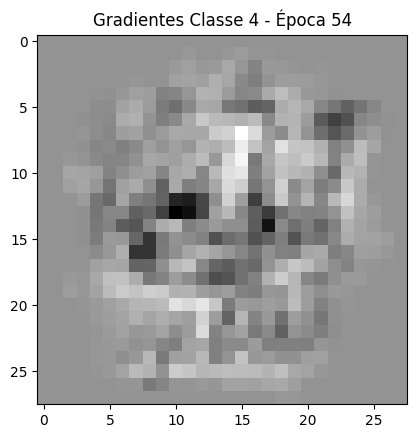

Epoch[55/100], loss: 0.207957, acc: 0.959000


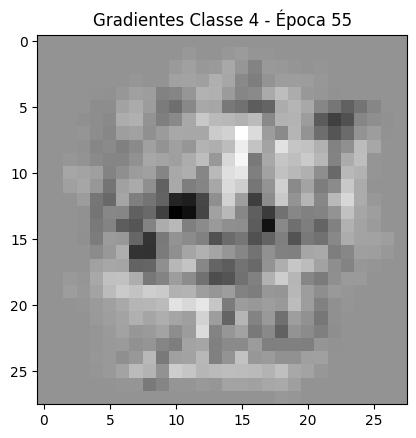

Epoch[56/100], loss: 0.207178, acc: 0.959000


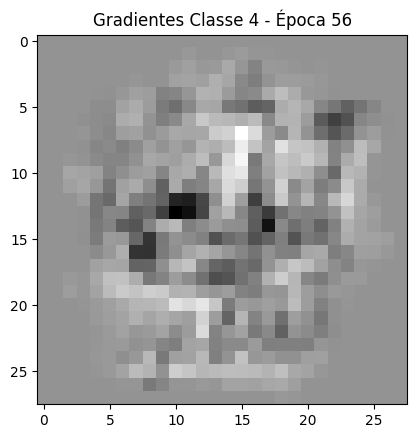

Epoch[57/100], loss: 0.206405, acc: 0.959000


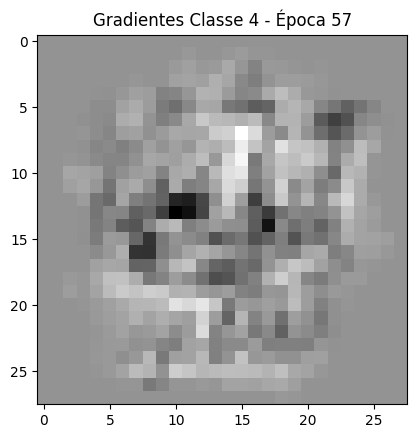

Epoch[58/100], loss: 0.205638, acc: 0.959000


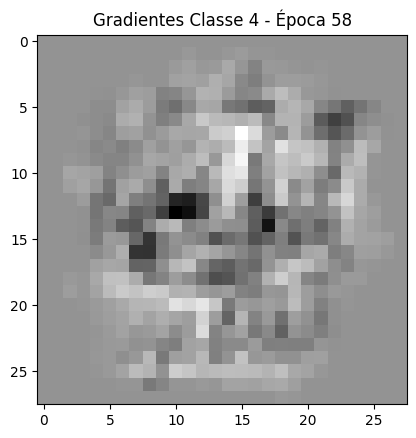

Epoch[59/100], loss: 0.204877, acc: 0.959000


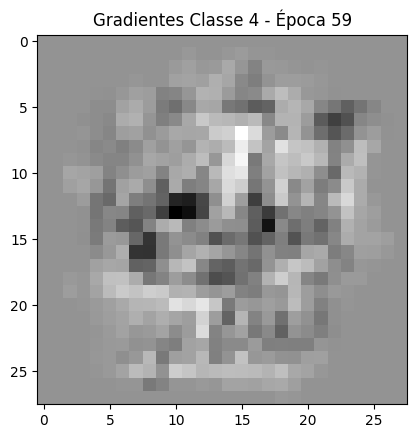

Epoch[60/100], loss: 0.204121, acc: 0.959000


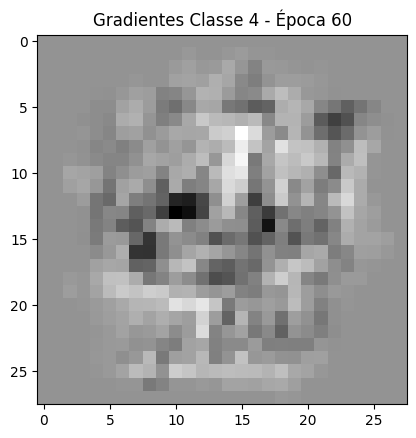

Epoch[61/100], loss: 0.203372, acc: 0.959000


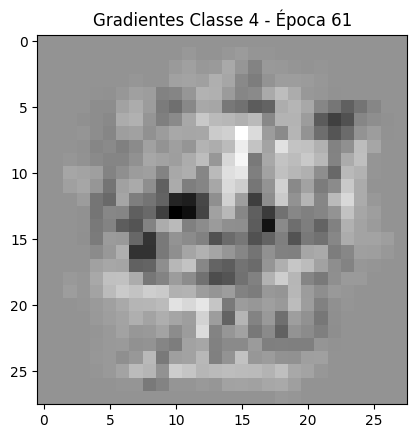

Epoch[62/100], loss: 0.202627, acc: 0.959000


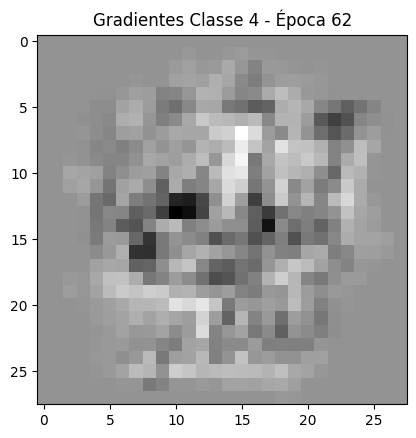

Epoch[63/100], loss: 0.201889, acc: 0.959000


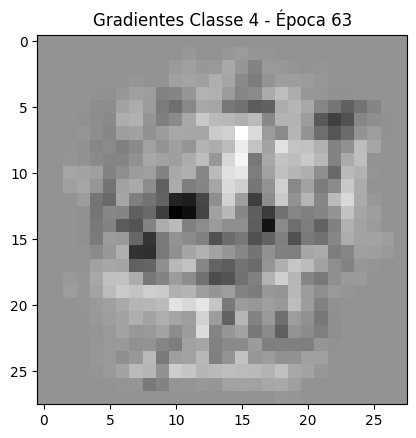

Epoch[64/100], loss: 0.201155, acc: 0.959000


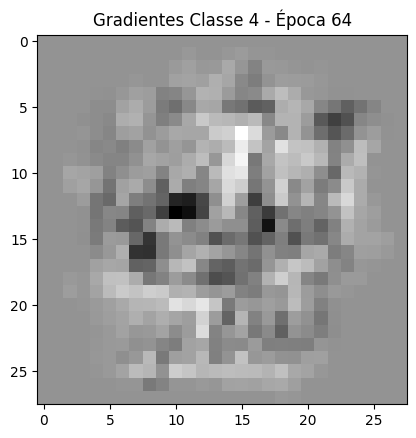

Epoch[65/100], loss: 0.200427, acc: 0.959000


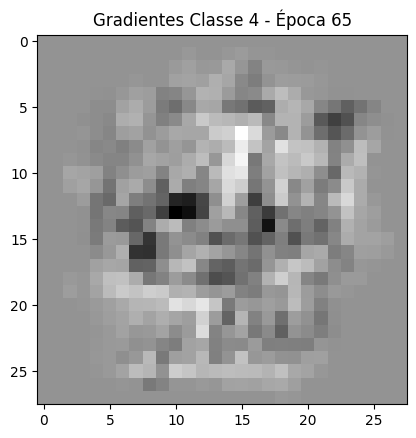

Epoch[66/100], loss: 0.199705, acc: 0.960000


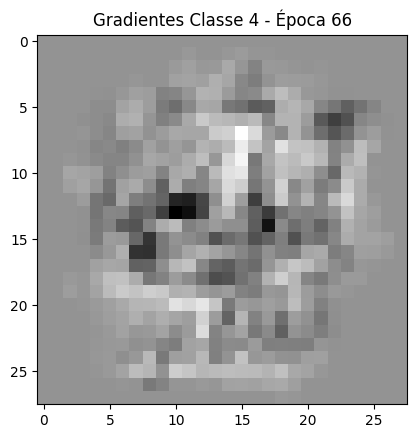

Epoch[67/100], loss: 0.198987, acc: 0.961000


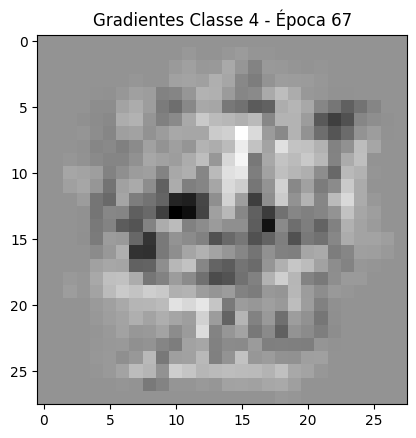

Epoch[68/100], loss: 0.198275, acc: 0.961000


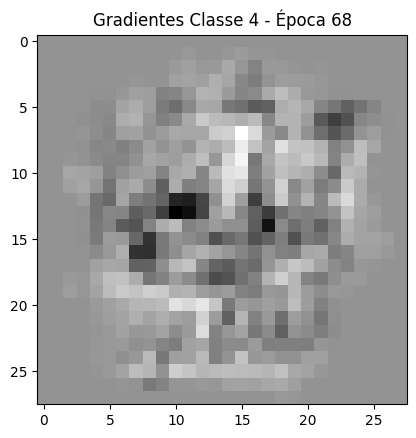

Epoch[69/100], loss: 0.197568, acc: 0.962000


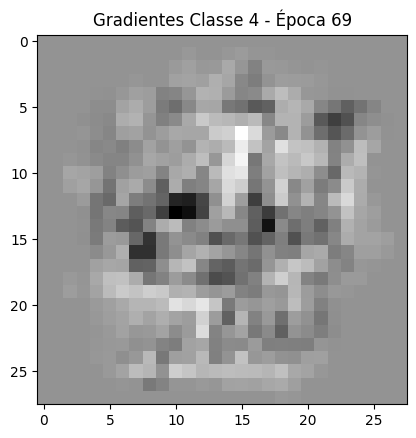

Epoch[70/100], loss: 0.196866, acc: 0.962000


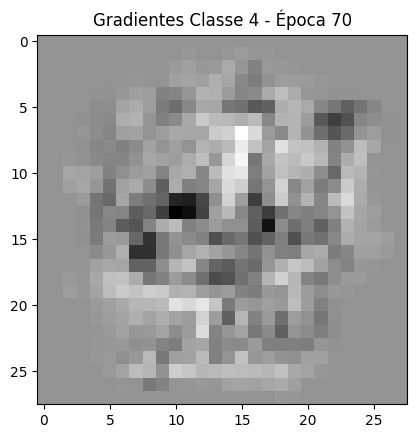

Epoch[71/100], loss: 0.196169, acc: 0.962000


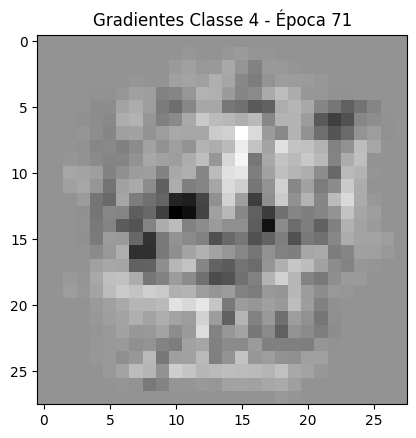

Epoch[72/100], loss: 0.195477, acc: 0.962000


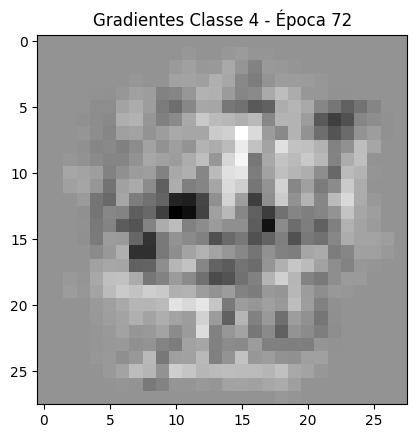

Epoch[73/100], loss: 0.194789, acc: 0.962000


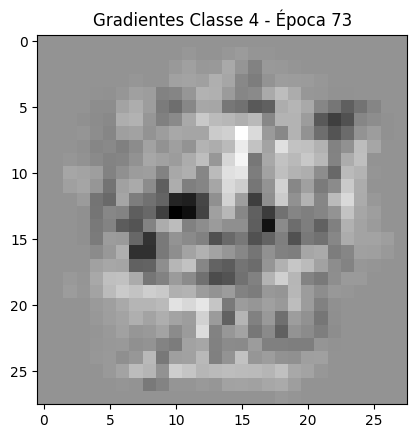

Epoch[74/100], loss: 0.194107, acc: 0.962000


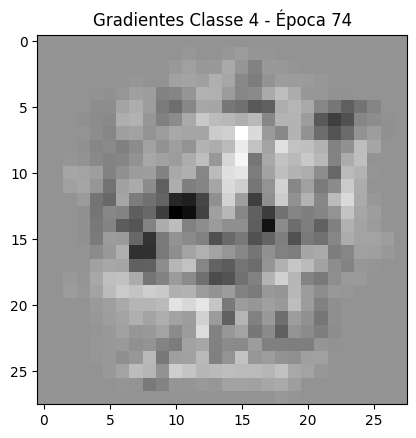

Epoch[75/100], loss: 0.193429, acc: 0.962000


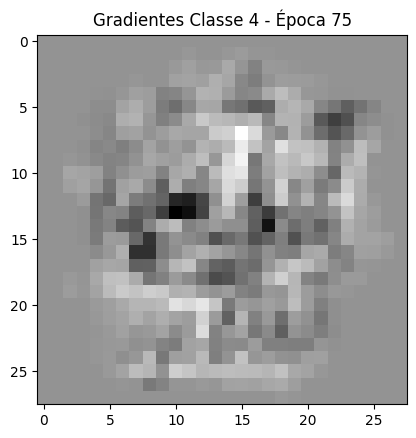

Epoch[76/100], loss: 0.192756, acc: 0.962000


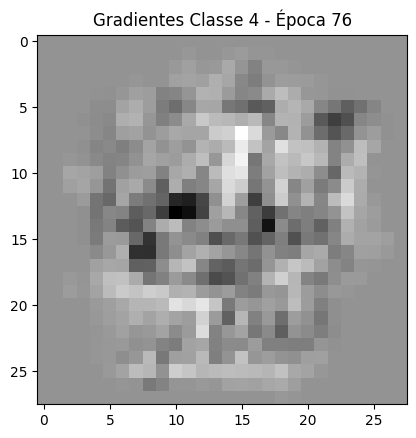

Epoch[77/100], loss: 0.192088, acc: 0.964000


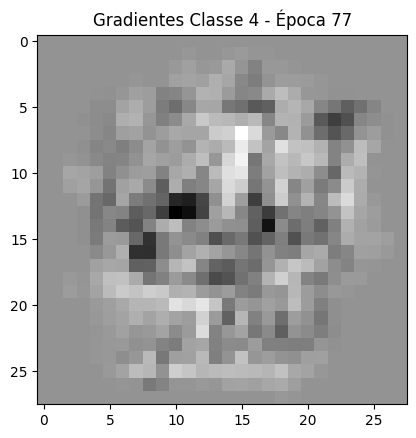

Epoch[78/100], loss: 0.191424, acc: 0.964000


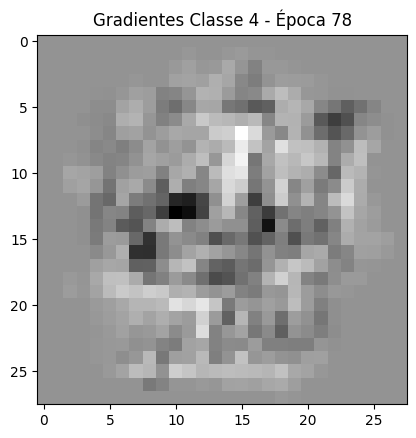

Epoch[79/100], loss: 0.190765, acc: 0.965000


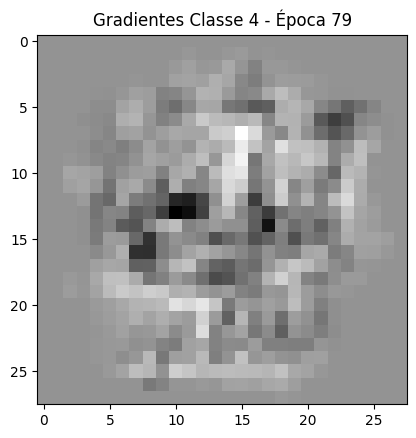

Epoch[80/100], loss: 0.190110, acc: 0.965000


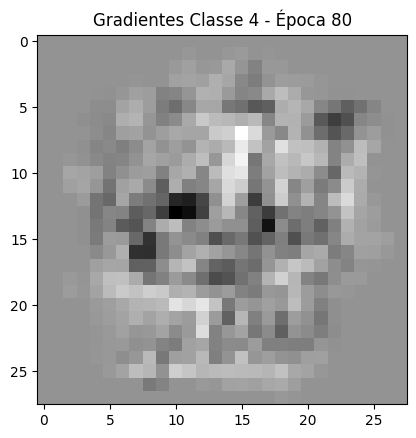

Epoch[81/100], loss: 0.189460, acc: 0.965000


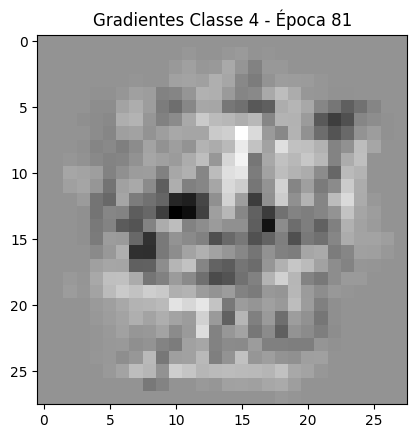

Epoch[82/100], loss: 0.188814, acc: 0.965000


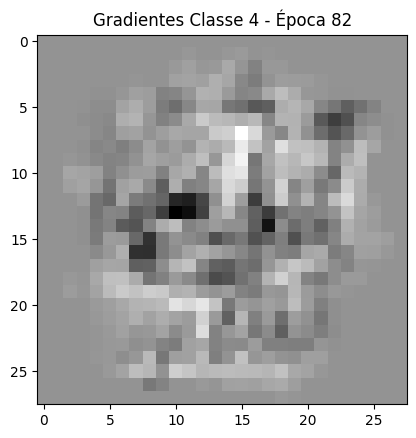

Epoch[83/100], loss: 0.188172, acc: 0.965000


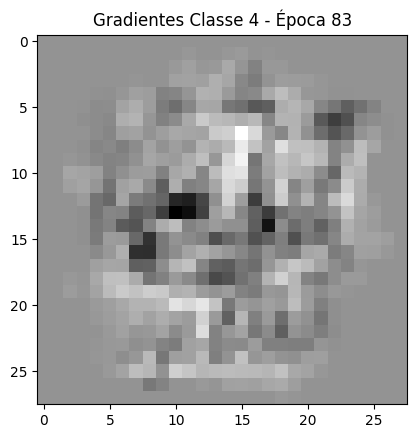

Epoch[84/100], loss: 0.187535, acc: 0.965000


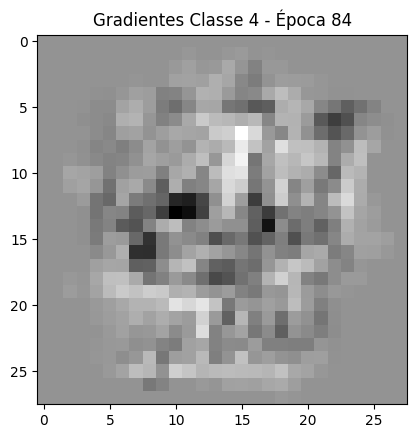

Epoch[85/100], loss: 0.186902, acc: 0.965000


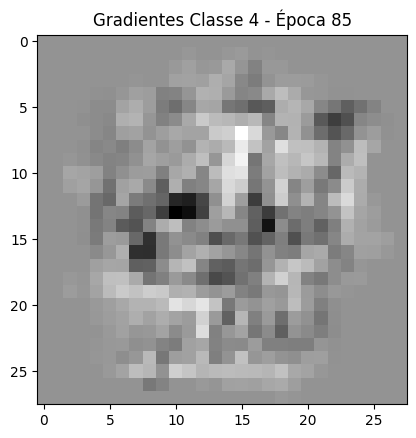

Epoch[86/100], loss: 0.186273, acc: 0.965000


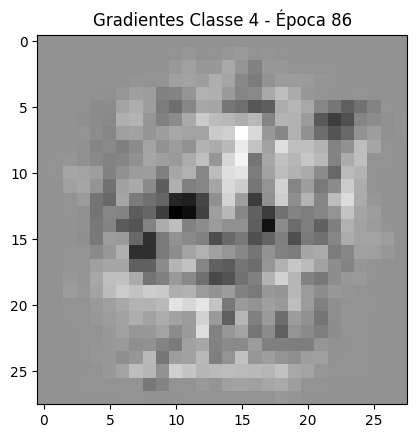

Epoch[87/100], loss: 0.185648, acc: 0.965000


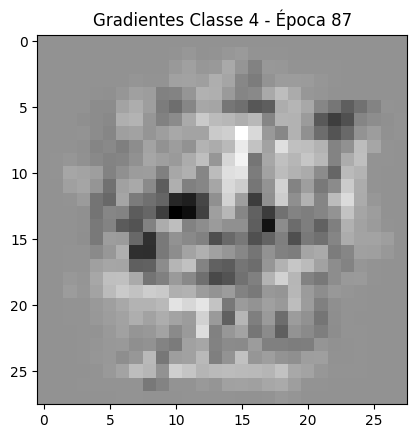

Epoch[88/100], loss: 0.185027, acc: 0.965000


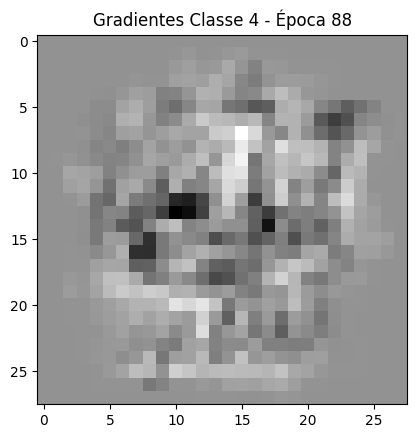

Epoch[89/100], loss: 0.184410, acc: 0.965000


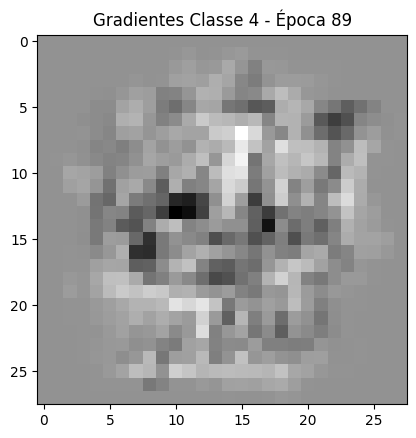

Epoch[90/100], loss: 0.183798, acc: 0.965000


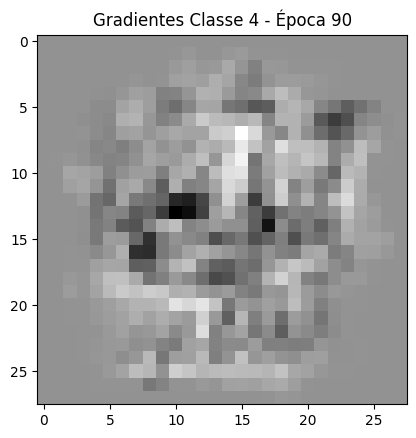

Epoch[91/100], loss: 0.183189, acc: 0.965000


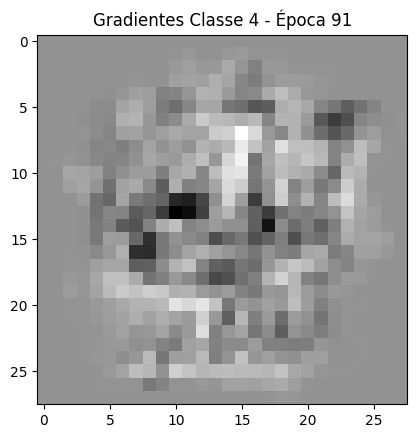

Epoch[92/100], loss: 0.182584, acc: 0.966000


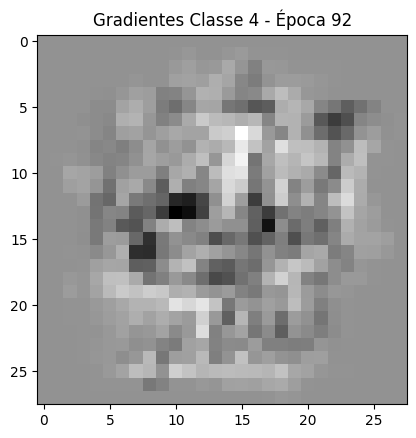

Epoch[93/100], loss: 0.181983, acc: 0.966000


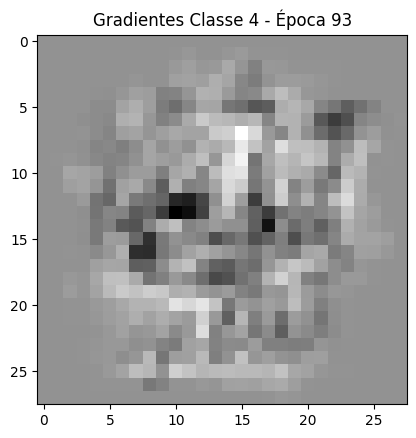

Epoch[94/100], loss: 0.181386, acc: 0.966000


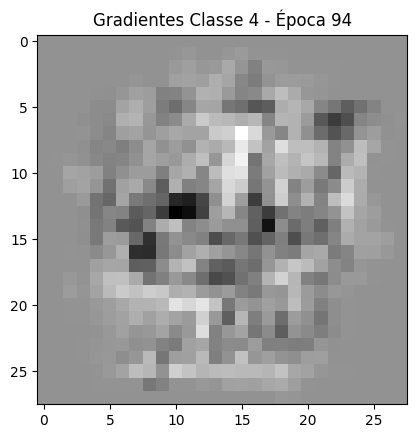

Epoch[95/100], loss: 0.180793, acc: 0.966000


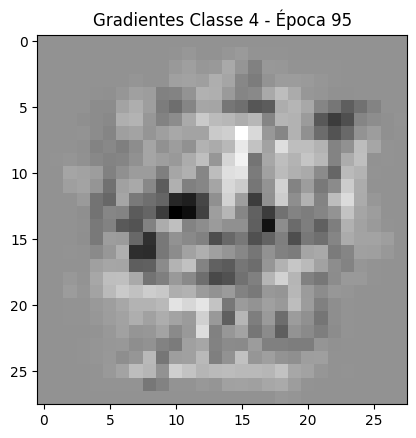

Epoch[96/100], loss: 0.180203, acc: 0.966000


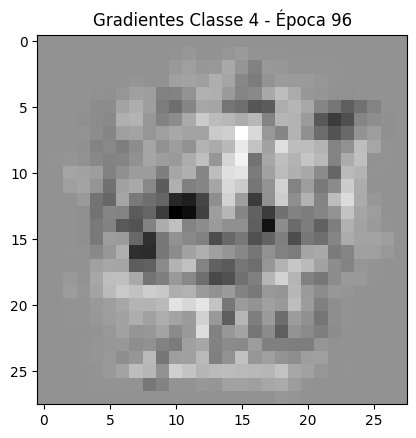

Epoch[97/100], loss: 0.179618, acc: 0.966000


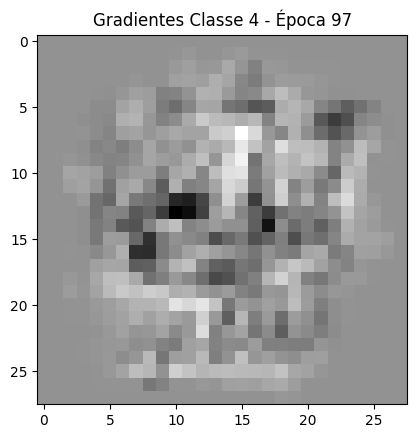

Epoch[98/100], loss: 0.179035, acc: 0.966000


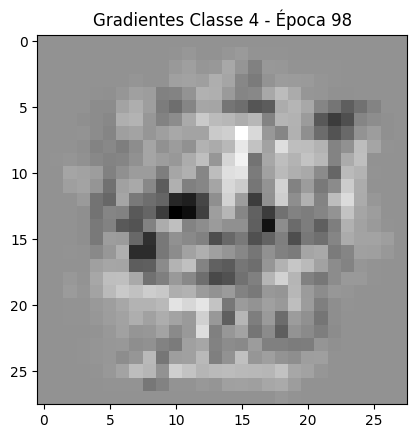

Epoch[99/100], loss: 0.178457, acc: 0.966000


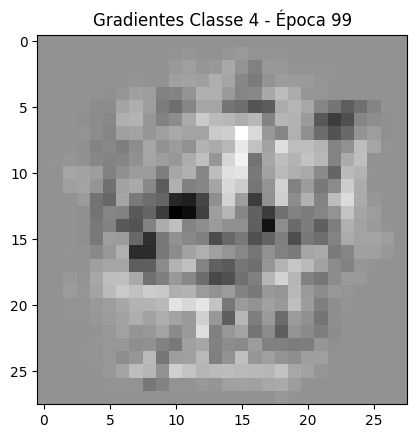

Epoch[100/100], loss: 0.177882, acc: 0.966000


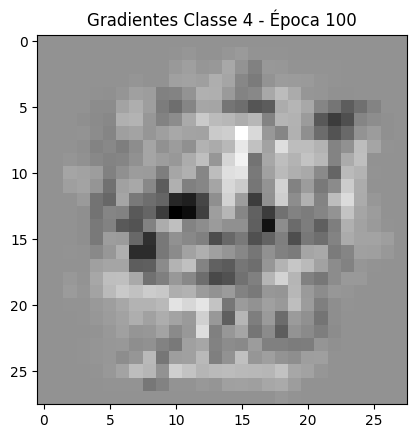

In [40]:
losses = []
import numpy
zs = []

for i in range(epochs):
    inputs = Variable(x_train.view(-1, 28 * 28))

    outputs = model(inputs)

    zs.append(outputs[1].detach().numpy())
    loss = criterion(outputs, Variable(y_train))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    _, predicts = torch.max(outputs, 1)
    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()


    print('Epoch[{}/{}], loss: {:.6f}, acc: {:.6f}'
              .format(i+1, epochs, loss.item(), accuracy))


    grads = model.weight.grad

    grad_img = grads[4, :].detach().numpy().reshape((28,28))

    plt.imshow(grad_img, cmap='gray')
    plt.title(f"Gradientes Classe 4 - Época {i+1}")
    plt.show()

In [ ]:
print('Final loss:', loss.item())

### Visualizando gráfico de perda durante o treinamento

In [ ]:
plt.plot(losses)

## Avaliação

### Acurácia tanto no conjunto de treinamento como no conjunto de testes

In [ ]:
def predict(model, input_data):
    outputs = model(Variable(input_data))
    _, predicts = torch.max(outputs, 1)

    return predicts.data

y_pred = predict(model, x_train.view(-1, 28*28))
accuracy = (y_pred.numpy() == y_train.numpy()).mean()
print('Accuracy:', accuracy)

### Matriz de confusão com dados de treinamento e teste

In [ ]:
print('Matriz de confusão:')
pd.crosstab(y_pred.numpy(), y_train.numpy())

## Visualizando a matriz de pesos treinados

Observe que a matriz de peso treinado para cada classe mostra a importância dos pesos associados aos caracteres de cada classe.

In [ ]:
weights = model.state_dict()['weight']
print('weights:', weights.shape)

bias = model.state_dict()['bias']
print('bias:   ', bias.shape)

# Visualizando pesos da classe 3
plt.imshow(weights[3, :].numpy().reshape((28,28)),cmap = 'gray')
plt.show()

### Visualizando os pesos de todas as classes

In [ ]:
# cria um grid com as imagens
grid = torchvision.utils.make_grid(weights.view(-1, 1, 28, 28), normalize=True, pad_value=1.0, padding=1, nrow=10)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off');

### Diagrama da regressão softmax com visualização dos pesos W

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoSoftmaxArgmaxNMIST.png)

# Atividades

## Exercícios

- 1) Na configuração da figura acima, mostre os valores de z0 até z9, os valores das probabilidades y_hat, após o softmax, quando a rede recebe como entrada a nona amostra que contém o manuscrito do dígito '4':

- 2) Insira código no laço do treinamento para que no final de cada época,
     seja impresso: o número da época e a perda e a acurácia

- 3) Insira código no laço do treinamento para visualização dos valores dos gradientes referentes à classe do dígito 4, no final de cada época.

## Perguntas

1. Qual é o shape da matriz de entrada na rede? \
"(N, 784)".
Onde N é o número de amostras (batch size) e 784 é a dimensão da imagem achatada (28x28).
2. Qual é o shape da saída da rede? \
"(N, 10)".
São 10 neurônios na saída, um para cada classe (dígitos 0 a 9).
3. Qual é o número total de parâmetros da rede, incluindo o bias? \
É de 7850.
Sendo 7840 pesos (784 entradas * 10 saídas) + 10 bias.

# Aprendizados


1. Os atributos são os pixels rasterizados (28x28) para entrada na rede neural
2. Formato de imagem pode ser canal primeiro ou canal último (c,H,W) ou (H,W,c) respectivamente. O PyTorch utiliza formato (amostras, c, H, W). O matplotlib imshow utiliza formato (H,W,c) ou (H,W)
3. Este exemplo permite uma interpretação visual dos pesos (parâmetros treinados)